In [ ]:
# Copyright 2022 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

[![View on GitHub][github-badge]][github-eda] [![Open In Colab][colab-badge]][colab-eda] [![Open in Binder][binder-badge]][binder-eda]

[github-badge]: https://img.shields.io/badge/View-on%20GitHub-blue?logo=GitHub
[colab-badge]: https://colab.research.google.com/assets/colab-badge.svg
[binder-badge]: https://static.mybinder.org/badge_logo.svg

[github-eda]: https://github.com/mbrukman/reimplementing-ml-papers/blob/main/datasets/mnist/MNIST_-_Exploratory_Data_Analysis.ipynb
[colab-eda]: https://colab.research.google.com/github/mbrukman/reimplementing-ml-papers/blob/main/datasets/mnist/MNIST_-_Exploratory_Data_Analysis.ipynb
[binder-eda]: https://mybinder.org/v2/gh/mbrukman/reimplementing-ml-papers/main?filepath=datasets/mnist/MNIST_-_Exploratory_Data_Analysis.ipynb

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from tensorflow import keras

In [ ]:
%pip install -q -U 'einops==0.4'
import einops

In [ ]:
%%capture
# Load the MNIST dataset.
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = keras.datasets.mnist.load_data()

In [ ]:
# Examine the dataset shape.
print('Raw data:')
print(f'Train x: {x_train_raw.shape}')
print(f'      y: {y_train_raw.shape}')
print(f'Test  x: {x_test_raw.shape}')
print(f'      y: {y_test_raw.shape}')

Raw data:
Train x: (60000, 28, 28)
      y: (60000,)
Test  x: (10000, 28, 28)
      y: (10000,)


## Examine and update the input data

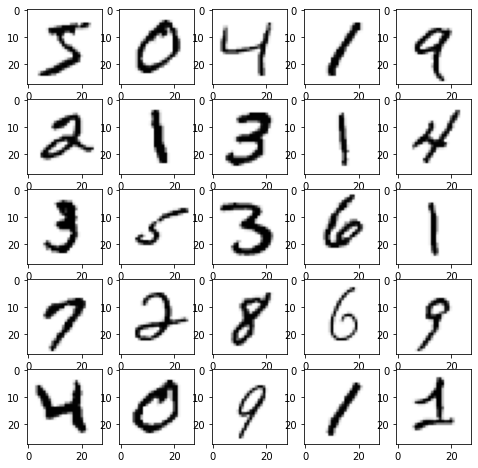

In [ ]:
# Let's see what some of the training images look like.
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train_raw[i, :, :], cmap='Greys')
plt.show()

In [ ]:
# Scale train and test inputs by converting them from range of [0, 255] to [0.0, 1.0]
x_train = x_train_raw.astype('float32') / 255.0
x_test = x_test_raw.astype('float32') / 255.0

In [ ]:
# Example statistics of X before and after scaling.
print(f"X train (raw): min={x_train_raw.min()}, max={x_train_raw.max()}")
print(f"     (scaled): min={x_train.min()}, max={x_train.max()}")
print(f"X test  (raw): min={x_test_raw.min()}, max={x_test_raw.max()}")
print(f"     (scaled): min={x_test.min()}, max={x_test.max()}")

X train (raw): min=0, max=255
     (scaled): min=0.0, max=1.0
X test  (raw): min=0, max=255
     (scaled): min=0.0, max=1.0


In [ ]:
# Add a channel dimension so that our inputs have the dimension (28, 28, 1)
# rather than (28, 28). This is done by converting our input of
# (batch, width, height) -> (batch, width, height, channels) with channels=1.
#
# In this specific case, this reshapes (60000, 28, 28) -> (60000, 28, 28, 1).
#
# Although this is similar to expanding dimensions via NumPy as follows:
#
#     x_train = np.expand_dims(x_train_raw, -1)
#     x_test = np.expand_dims(x_test_raw, -1)
#
# the approach with `einops` makes it much more readable and understandable.
x_train = einops.rearrange(x_train, 'b w h -> b w h ()')
x_test = einops.rearrange(x_test, 'b w h -> b w h ()')

In [ ]:
print('Dimension comparison:')
print(f'Train x (raw):      {x_train_raw.shape}')
print(f'      x (expanded): {x_train.shape}')
print(f'Test  x (raw):      {x_test_raw.shape}')
print(f'      x (expanded): {x_test.shape}')

Dimension comparison:
Train x (raw):      (60000, 28, 28)
      x (expanded): (60000, 28, 28, 1)
Test  x (raw):      (10000, 28, 28)
      x (expanded): (10000, 28, 28, 1)


## Examine and format the labels

In [ ]:
# Examine the format of the raw Y values.
print(f'y[0:4] = {y_train_raw[0:4]}')

y[0:4] = [5 0 4 1]


Since the $y$ values are the expected digits, but our network will output one-hot encoding of all 10 digits with probabilities of each value, we will need to convert it to a categorical value below.

In [ ]:
# Convert labels to one-hot encoding to match the output of LeNet-5 network.
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)

In [ ]:
print('Processed data shape:')
print(f'Train y (raw):     {y_train_raw.shape}')
print(f'      y (one-hot): {y_train.shape}')
print(f'Test  y (raw):     {y_test_raw.shape}')
print(f'      y (one-hot): {y_test.shape}')

Processed data shape:
Train y (raw):     (60000,)
      y (one-hot): (60000, 10)
Test  y (raw):     (10000,)
      y (one-hot): (10000, 10)


In [ ]:
# Examine the format of the Y values before and after preprocessing.
print('Y (train) sample values before preprocessing:')
print(y_train_raw[0:4])

print('\nY (train) sample values after preprocessing:')
print(y_train[0:4])

Y (train) sample values before preprocessing:
[5 0 4 1]

Y (train) sample values after preprocessing:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Using the library to simplify input and label transformations

This directory provides [`mnist_keras.py`][mnist-github] library which includes the
above transformations for scaling the input and converting the labels to a
categorical (one-hot) representation from the default numeric values, so you
can use it to simplify the data setup for training and testing MNIST models.

You can see examples of how the library can be used in the [LeNet notebooks][lenet].

[mnist-github]: https://raw.githubusercontent.com/mbrukman/reimplementing-ml-papers/main/datasets/mnist/mnist_keras.py
[lenet]: https://github.com/mbrukman/reimplementing-ml-papers/tree/main/lenet